<a href="https://www.kaggle.com/code/dishaasinghi/titanic-beginner-friendly?scriptVersionId=127098911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Titanic Project Example Walk Through


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline

In [4]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')

In [5]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data, test_data])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

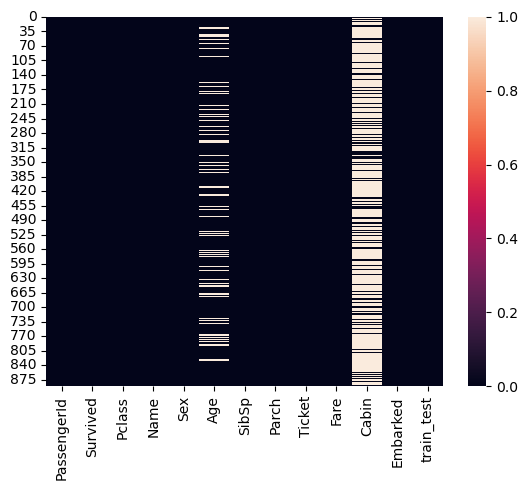

In [9]:
sbs.heatmap(train_data.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

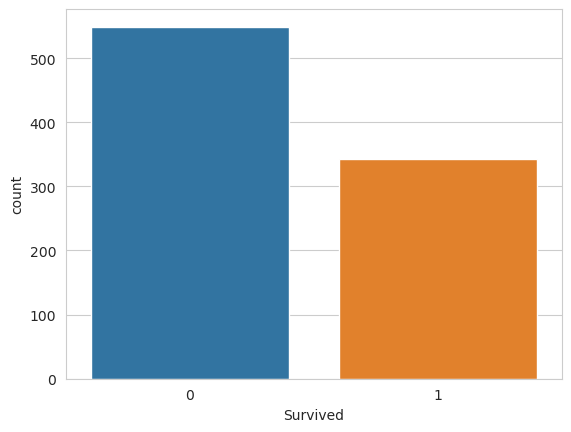

In [10]:
sbs.set_style('whitegrid')
sbs.countplot(x='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

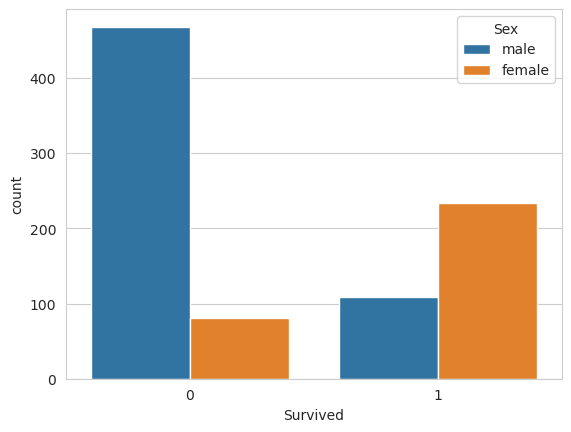

In [11]:
sbs.set_style('whitegrid')
sbs.countplot(x='Survived', hue='Sex', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

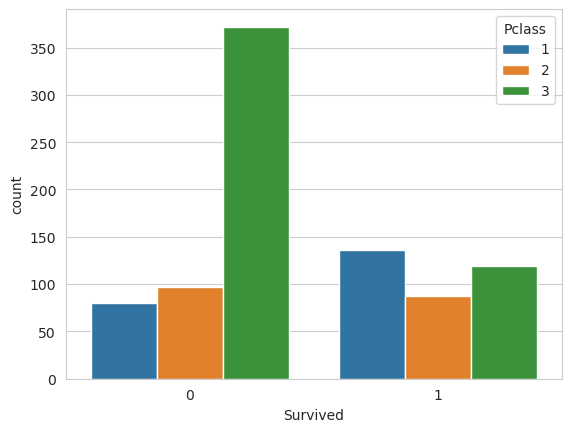

In [12]:
sbs.set_style('whitegrid')
sbs.countplot(x='Survived', hue='Pclass', data=train_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age'>

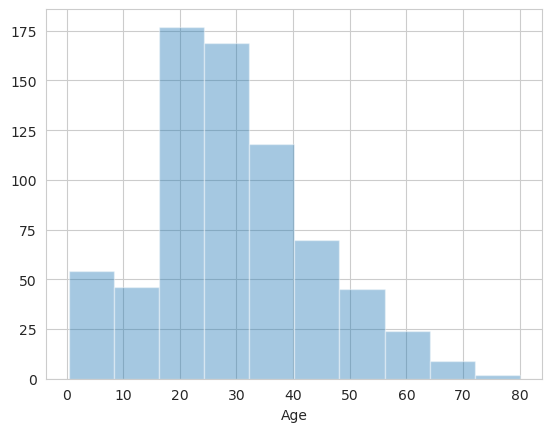

In [13]:
sbs.distplot(train_data['Age'].dropna(), kde=False, bins=10)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

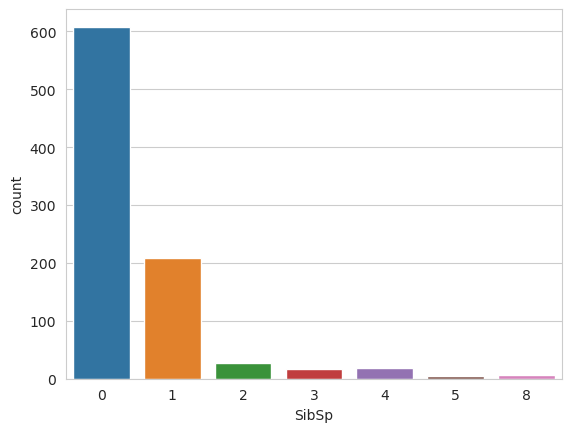

In [14]:
sbs.countplot(x='SibSp', data=train_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

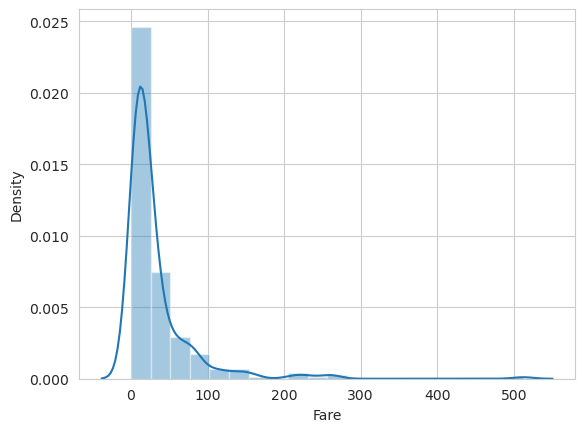

In [15]:
sbs.distplot(train_data['Fare'], bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

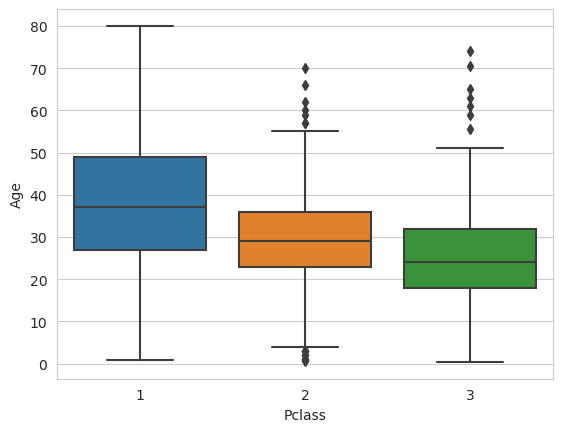

In [16]:
sbs.boxplot(x='Pclass', y='Age', data=train_data)

In [17]:
def function(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
        
    else:
        return Age

In [18]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(function,axis=1)

<AxesSubplot:>

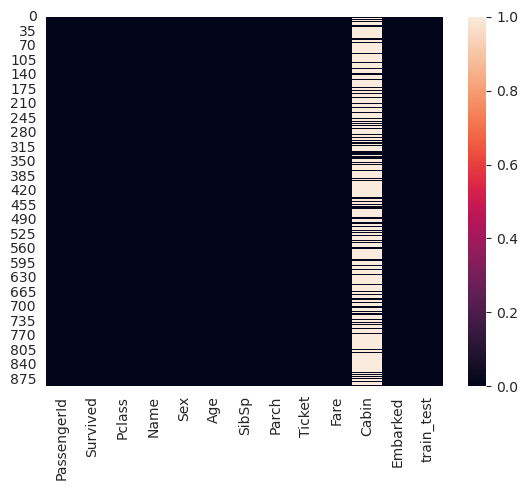

In [19]:
sbs.heatmap(train_data.isnull())

In [20]:
train_data.drop('Cabin', axis=1, inplace=True)

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [22]:
#To calculate the required percenatge of women who survived 
women = train_data.loc[train_data.Sex =="female"]["Survived"]
rate_women = (sum(women)/len(women))*100

print("Percentage of women who survived", rate_women)

Percentage of women who survived 74.20382165605095


In [23]:
#To calculate the required number of men who survived 
men = train_data.loc[train_data.Sex=="male"]["Survived"]
rate_men = (sum(men)/len(men))*100

print("Percentage of women who survived", rate_men)

Percentage of women who survived 18.890814558058924


In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


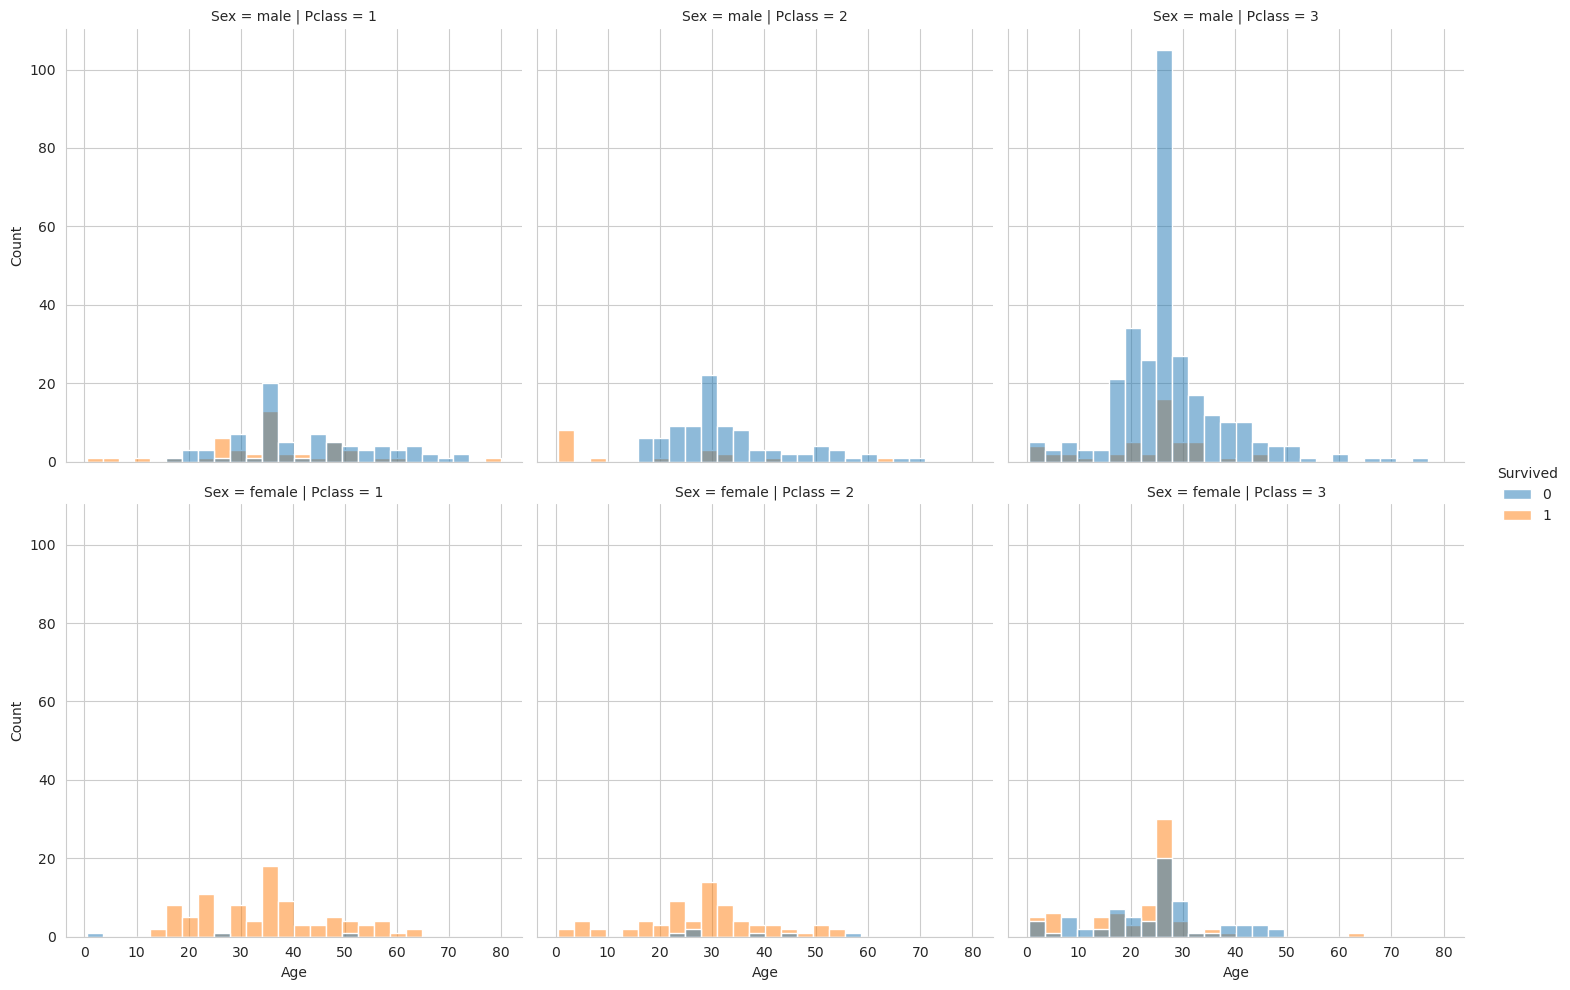

In [25]:
sbs.displot(data=train_data, x="Age", row="Sex", col="Pclass", hue="Survived")

([<matplotlib.patches.Wedge at 0x79acbd4e51d0>,
 [Text(-0.8839489683935541, 0.6547016276716988, 'Women who Survived'),
  Text(0.8839489377447579, -0.6547016690523358, 'Men who Suvived')])

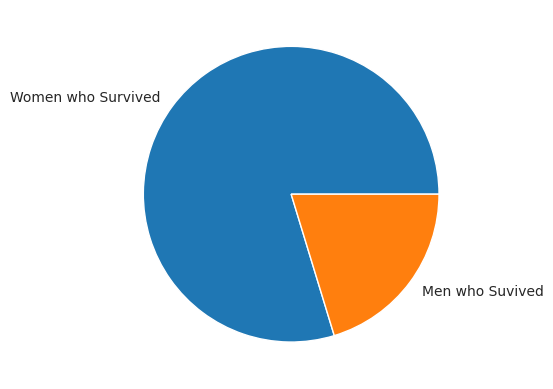

In [26]:
#Graphic Representation to check how many women survived and how many men survived. 
labels = ['Women who Survived', 'Men who Suvived']
x = [rate_women, rate_men]
plt.pie(x, labels = labels)

#Through this presentation, we conclude that more percenatge of women survived than men

In [27]:
train_data.drop(['Ticket'], axis=1, inplace=True)

In [28]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train_data.drop(['Name'], axis=1, inplace=True)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [31]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
train_test     0
dtype: int64

In [32]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [33]:
train_data.replace('S', 1, inplace=True)
train_data.replace('C', 2, inplace=True)
train_data.replace('Q', 3, inplace=True)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,1,0,3,male,22.0,1,0,7.2500,1,1
1,2,1,1,female,38.0,1,0,71.2833,2,1
2,3,1,3,female,26.0,0,0,7.9250,1,1
3,4,1,1,female,35.0,1,0,53.1000,1,1
4,5,0,3,male,35.0,0,0,8.0500,1,1


In [35]:
train_data.shape

(891, 10)

In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN


In [37]:
test_data.replace('S', 1, inplace=True)
test_data.replace('C', 2, inplace=True)
test_data.replace('Q', 3, inplace=True)

In [38]:
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Sex', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [39]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,train_test,Survived
0,892,3,34.5,0,0,7.8292,3,0,NaN
1,893,3,47.0,1,0,7.0000,1,0,NaN
2,894,2,62.0,0,0,9.6875,3,0,NaN
3,895,3,27.0,0,0,8.6625,1,0,NaN
4,896,3,22.0,1,1,12.2875,1,0,NaN


In [40]:
test_data.shape

(418, 9)

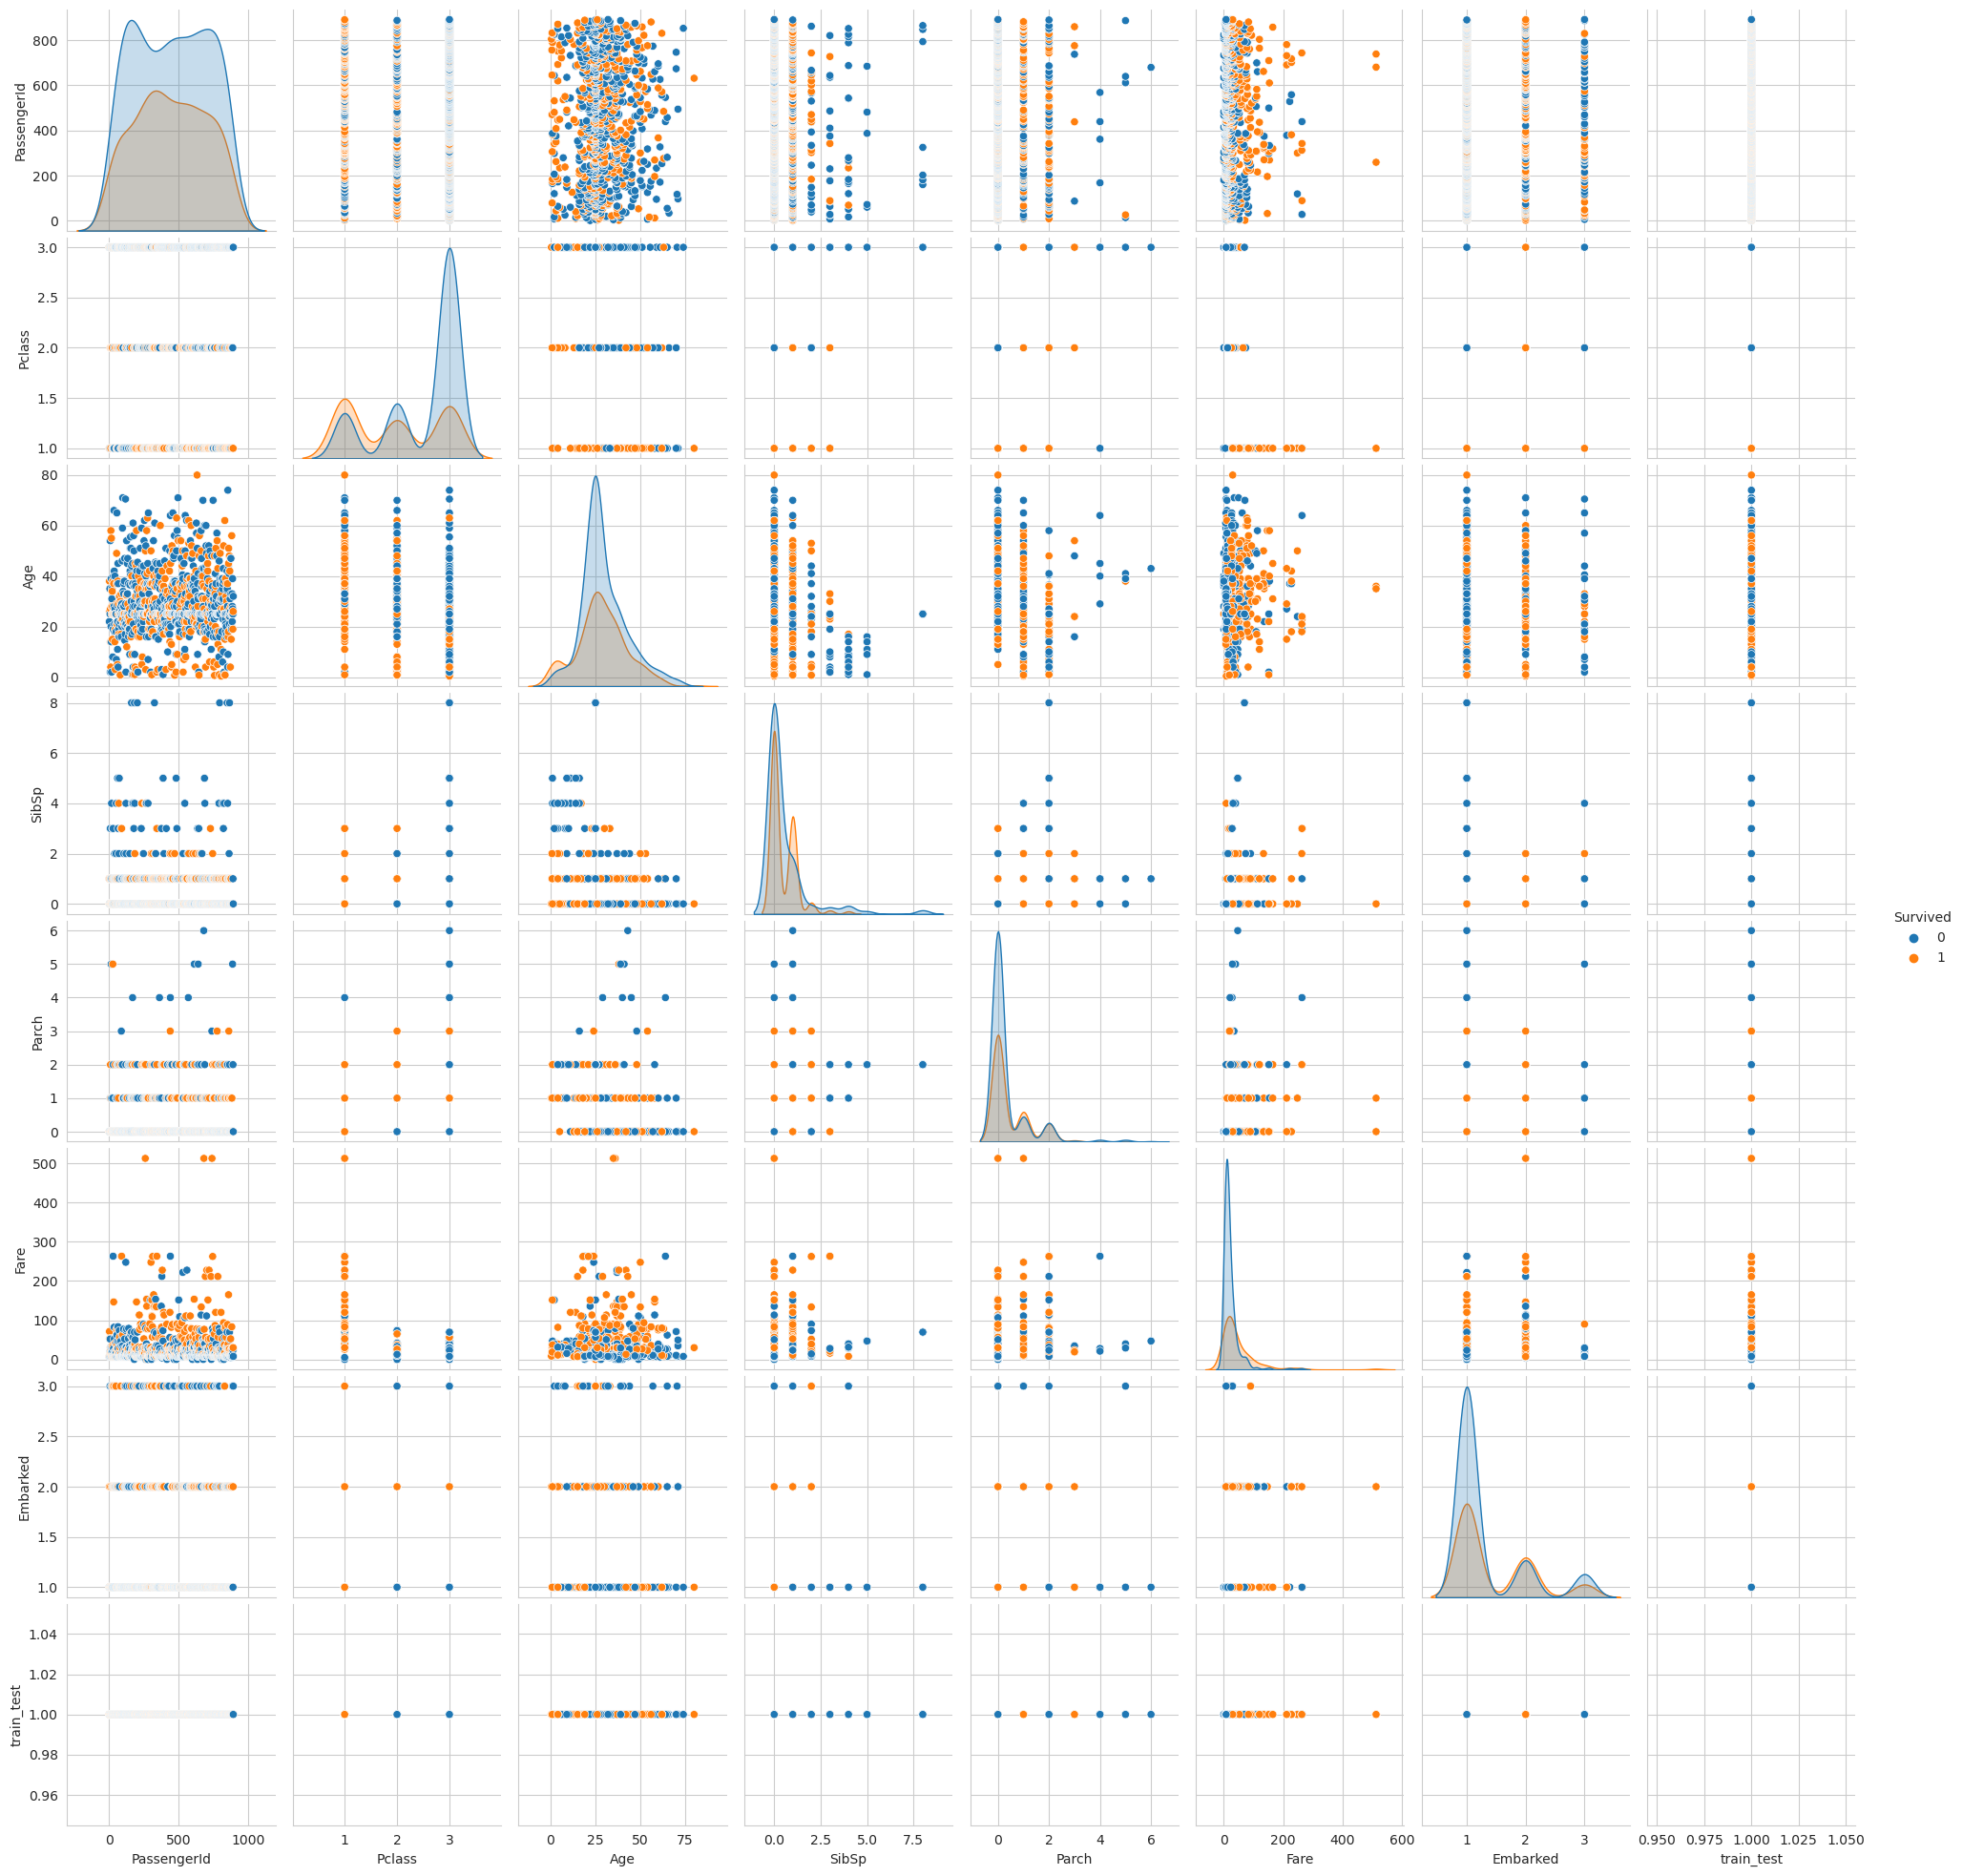

In [41]:
sbs.pairplot(data= train_data, hue='Survived')

In [42]:
df=train_data.append(test_data)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,1,0.0,3,male,22.0,1,0,7.2500,1,1
1,2,1.0,1,female,38.0,1,0,71.2833,2,1
2,3,1.0,3,female,26.0,0,0,7.9250,1,1
3,4,1.0,1,female,35.0,1,0,53.1000,1,1
4,5,0.0,3,male,35.0,0,0,8.0500,1,1


In [44]:
df.drop(['Sex'], axis=1, inplace=True)

In [45]:
## Feature Scaling
df_test=df[df['Survived'].isnull()]
df_train=df[~df['Survived'].isnull()]

In [46]:
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.33, 
                                   shuffle=True)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
y = train_data["Survived"]
features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model.fit(X,y)
predictions = model.predict(X_test)

In [48]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission successful!")

Submission successful!


In [49]:
df=pd.read_csv('submission.csv')

In [50]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
